In [18]:
import uproot
import awkward as ak
import numpy as np
import math
import sklearn.metrics as m
import numba as nb
from coffea.nanoevents.methods import vector
from coffea.nanoevents import NanoEventsFactory, BaseSchema, NanoAODSchema
import os

import boost_histogram as bh
from matplotlib import pyplot as plt
import matplotlib as mpl
from cycler import cycler
import mplhep as hep
use_helvet = False  ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

import os, sys  

# os.environ['OPENBLAS_NUM_THREADS'] = '1'

class dotdict(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__
    
#env:lpr


In [19]:
def rem_nan(arr):
    return arr[~np.isnan(arr)]

In [20]:
MAIN_DIR = ".."

plot_dir = f"{MAIN_DIR}/plots/ROC/5Aug2014"
_ = os.system(f"mkdir -p {plot_dir}")

## Check electron

In [21]:
# load the slimmedtree files using uproot
# if run on PKU cluster, use this:
CustNanoData = {
    'TT_Semilep'         :"/data/bond/zhaoyz/Pheno/slimmedtree/sm/set_52M_v2.root",
}
files = { }
for typefile in CustNanoData:
    files[typefile] = uproot.lazy({CustNanoData[typefile]: "PKUTree"})

In [22]:
def get_tagger(file, alpha = 0, beta = 0):
    # print(f"add tagger for {sample}")
    Wcbtagger = file["hbc"] / (file["hbc"] + alpha * file["qcd"] + beta * file["hbq"])
    return Wcbtagger

/tmp/ipykernel_3021500/2403028544.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = ak.to_numpy(files["TT_Semilep"]["isWcb"]).astype(np.int)
/tmp/ipykernel_3021500/2403028544.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional in

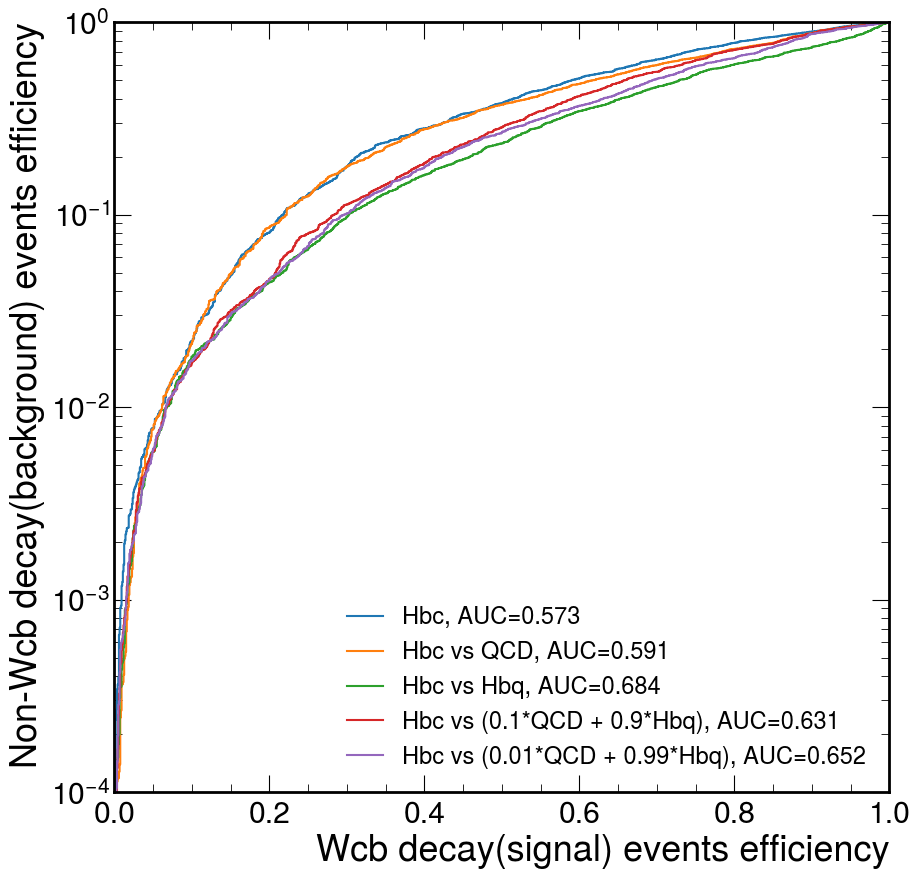

In [25]:
# make ROC curve by all tagger

f, ax = plt.subplots(figsize=(10,10))

y_score =  np.nan_to_num(ak.to_numpy(files["TT_Semilep"]["hbc"]))
y_true = ak.to_numpy(files["TT_Semilep"]["isWcb"]).astype(np.int)
fpr, tpr, thres = m.roc_curve(y_true, y_score)
ax.plot(tpr, fpr, label=f'Hbc, AUC={m.auc(fpr, tpr):.3f}')


y_score =  np.nan_to_num(ak.to_numpy(get_tagger(files["TT_Semilep"], alpha = 1, beta = 0)))
y_true = ak.to_numpy(files["TT_Semilep"]["isWcb"]).astype(np.int)
fpr, tpr, thres = m.roc_curve(y_true, y_score)
ax.plot(tpr, fpr, label=f'Hbc vs QCD, AUC={m.auc(fpr, tpr):.3f}')

y_score =  np.nan_to_num(ak.to_numpy(get_tagger(files["TT_Semilep"], alpha = 0, beta = 1)))
y_true = ak.to_numpy(files["TT_Semilep"]["isWcb"]).astype(np.int)
fpr, tpr, thres = m.roc_curve(y_true, y_score)
ax.plot(tpr, fpr, label=f'Hbc vs Hbq, AUC={m.auc(fpr, tpr):.3f}')

y_score =  np.nan_to_num(ak.to_numpy(get_tagger(files["TT_Semilep"], alpha = 0.1, beta = 0.9)))
y_true = ak.to_numpy(files["TT_Semilep"]["isWcb"]).astype(np.int)
fpr, tpr, thres = m.roc_curve(y_true, y_score)
ax.plot(tpr, fpr, label=f'Hbc vs (0.1*QCD + 0.9*Hbq), AUC={m.auc(fpr, tpr):.3f}')

y_score =  np.nan_to_num(ak.to_numpy(get_tagger(files["TT_Semilep"], alpha = 0.01, beta = 0.99)))
y_true = ak.to_numpy(files["TT_Semilep"]["isWcb"]).astype(np.int)
fpr, tpr, thres = m.roc_curve(y_true, y_score)
ax.plot(tpr, fpr, label=f'Hbc vs (0.01*QCD + 0.99*Hbq), AUC={m.auc(fpr, tpr):.3f}')

ax.set_xlabel('Wcb decay(signal) events efficiency', ha='right', x=1.0); 
ax.set_ylabel('Non-Wcb decay(background) events efficiency', ha='right', y=1.0);
ax.set_xlim(0, 1); ax.set_ylim(1e-4, 1);
ax.set_yscale('log')
ax.legend(loc = "lower right",fontsize = 17)


plt.savefig(f"{plot_dir}/ROC_taggers.pdf")
plt.show()

/tmp/ipykernel_3021500/92727580.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = ak.to_numpy(files["TT_Semilep"]["w_matched_cb"]).astype(np.int)
/tmp/ipykernel_3021500/92727580.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional

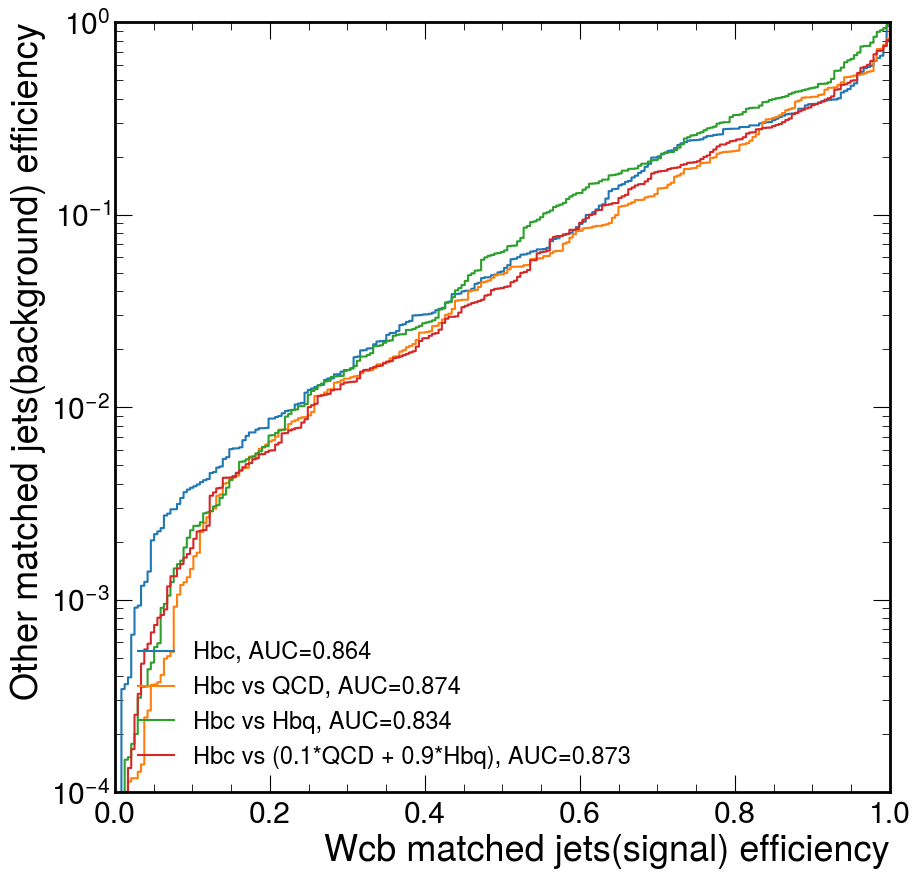

In [24]:
# make ROC curve by all tagger

f, ax = plt.subplots(figsize=(10,10))

y_score =  np.nan_to_num(ak.to_numpy(files["TT_Semilep"]["hbc"]))
y_true = ak.to_numpy(files["TT_Semilep"]["w_matched_cb"]).astype(np.int)
fpr, tpr, thres = m.roc_curve(y_true, y_score)
ax.plot(tpr, fpr, label=f'Hbc, AUC={m.auc(fpr, tpr):.3f}')


y_score =  np.nan_to_num(ak.to_numpy(get_tagger(files["TT_Semilep"], alpha = 1, beta = 0)))
y_true = ak.to_numpy(files["TT_Semilep"]["w_matched_cb"]).astype(np.int)
fpr, tpr, thres = m.roc_curve(y_true, y_score)
ax.plot(tpr, fpr, label=f'Hbc vs QCD, AUC={m.auc(fpr, tpr):.3f}')

y_score =  np.nan_to_num(ak.to_numpy(get_tagger(files["TT_Semilep"], alpha = 0, beta = 1)))
y_true = ak.to_numpy(files["TT_Semilep"]["w_matched_cb"]).astype(np.int)
fpr, tpr, thres = m.roc_curve(y_true, y_score)
ax.plot(tpr, fpr, label=f'Hbc vs Hbq, AUC={m.auc(fpr, tpr):.3f}')

y_score =  np.nan_to_num(ak.to_numpy(get_tagger(files["TT_Semilep"], alpha = 0.1, beta = 0.9)))
y_true = ak.to_numpy(files["TT_Semilep"]["w_matched_cb"]).astype(np.int)
fpr, tpr, thres = m.roc_curve(y_true, y_score)
ax.plot(tpr, fpr, label=f'Hbc vs (0.1*QCD + 0.9*Hbq), AUC={m.auc(fpr, tpr):.3f}')

ax.set_xlabel('Wcb matched jets(signal) efficiency', ha='right', x=1.0); 
ax.set_ylabel('Other matched jets(background) efficiency', ha='right', y=1.0);
ax.set_xlim(0, 1); ax.set_ylim(1e-4, 1);
ax.set_yscale('log')
ax.legend(loc = "lower left",fontsize = 17)


plt.savefig(f"{plot_dir}/ROC_taggers_matched.pdf")
plt.show()